# IMPORT LIBRARY

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Dataset

In [6]:
# Path to your dataset
base_dir = 'D:/datasetbuahsayur/Fruit And Vegetable Diseases Dataset'

# Define selected classes
classes = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten']

# Parameters
batch_size = 32
image_size = (128, 128)
epochs = 10

In [5]:
# Image data generator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% training, 20% validation
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=classes,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=classes,
    subset='validation',
    shuffle=False  # Shuffle disabled for consistency in validation
)

Found 8129 images belonging to 4 classes.
Found 2030 images belonging to 4 classes.


In [7]:
def build_and_compile_model(base_model):
    base_model.trainable = False  # Freeze the convolutional base
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(len(classes), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
def train_model(model, model_name):
    print(f"\nTraining {model_name}...")
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs,
        verbose=1
    )
    return history

In [11]:
def evaluate_model(model, model_name):
    # Predict on validation set
    Y_pred = model.predict(val_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    
    # Confusion Matrix and Classification Report
    cm = confusion_matrix(val_generator.classes, y_pred)
    cr = classification_report(val_generator.classes, y_pred, target_names=classes)
    
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm)
    
    print(f"\nClassification Report for {model_name}:")
    print(cr)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [13]:
models = {
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(*image_size, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(*image_size, 3)),
    "InceptionV3": InceptionV3(weights='imagenet', include_top=False, input_shape=(*image_size, 3))
}

histories = {}
trained_models = {}


Training VGG16...


C:\Users\fayah\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 503s 2s/step - accuracy: 0.4867 - loss: 1.2371 - val_accuracy: 0.6675 - val_loss: 0.7833
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.7967 - loss: 0.6749 - val_accuracy: 0.7522 - val_loss: 0.6015
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.8534 - loss: 0.4921 - val_accuracy: 0.7798 - val_loss: 0.5312
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.8758 - loss: 0.4050 - val_accuracy: 0.7906 - val_loss: 0.4901
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.8878 - loss: 0.3525 - val_accuracy: 0.7980 - val_loss: 0.4692
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.9003 - loss: 0.3164 - val_accuracy: 0.8236 - val_loss: 0.4425
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.9097 - loss: 0.2873 - val_accuracy: 0.8232 - val_loss: 0.4153
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.9181 - loss: 0.2629 - val_accu

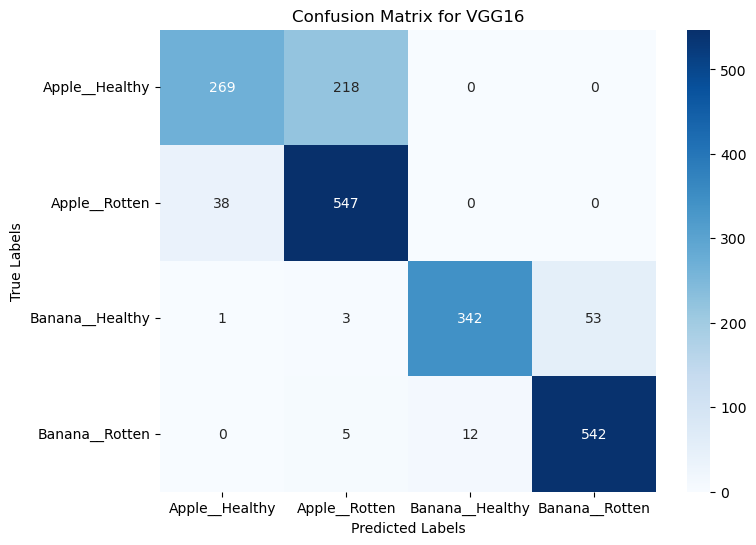


Training ResNet50...
Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 235s 858ms/step - accuracy: 0.3055 - loss: 1.3947 - val_accuracy: 0.4626 - val_loss: 1.3305
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 209s 817ms/step - accuracy: 0.4226 - loss: 1.3026 - val_accuracy: 0.4227 - val_loss: 1.2959
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 202s 793ms/step - accuracy: 0.4424 - loss: 1.2545 - val_accuracy: 0.4926 - val_loss: 1.2532
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 192s 751ms/step - accuracy: 0.4489 - loss: 1.2191 - val_accuracy: 0.4709 - val_loss: 1.2255
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 196s 767ms/step - accuracy: 0.4779 - loss: 1.1753 - val_accuracy: 0.4655 - val_loss: 1.1993
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 201s 788ms/step - accuracy: 0.5030 - loss: 1.1552 - val_accuracy: 0.4350 - val_loss: 1.1808
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 194s 762ms/step - accuracy: 0.4924 - loss: 1.1326 - val_accuracy: 0.4916 - val_loss: 1.1567
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 190s 746ms/ste

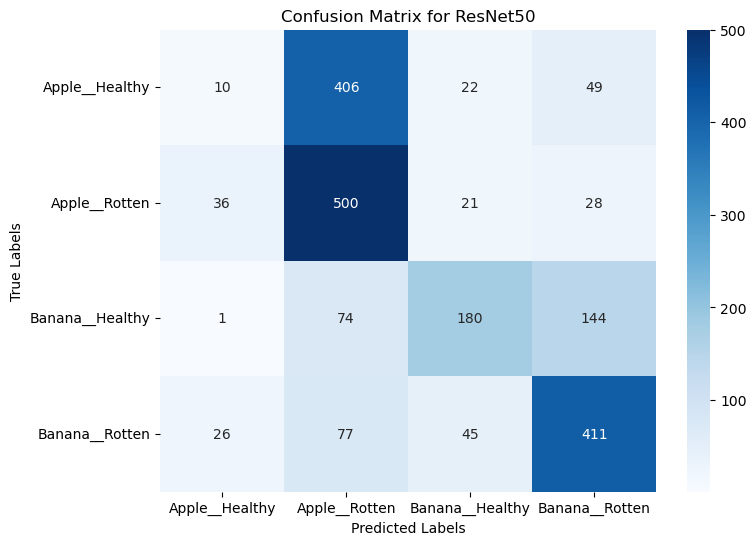


Training InceptionV3...
Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 234s 845ms/step - accuracy: 0.7640 - loss: 0.6257 - val_accuracy: 0.8611 - val_loss: 0.4182
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 202s 792ms/step - accuracy: 0.9485 - loss: 0.1523 - val_accuracy: 0.8941 - val_loss: 0.3425
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 200s 784ms/step - accuracy: 0.9591 - loss: 0.1133 - val_accuracy: 0.9025 - val_loss: 0.3222
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 207s 811ms/step - accuracy: 0.9672 - loss: 0.0992 - val_accuracy: 0.9133 - val_loss: 0.2694
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 206s 808ms/step - accuracy: 0.9720 - loss: 0.0791 - val_accuracy: 0.9099 - val_loss: 0.2876
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 202s 790ms/step - accuracy: 0.9749 - loss: 0.0742 - val_accuracy: 0.9069 - val_loss: 0.3074
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 203s 794ms/step - accuracy: 0.9787 - loss: 0.0665 - val_accuracy: 0.9187 - val_loss: 0.2494
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 207s 812ms/

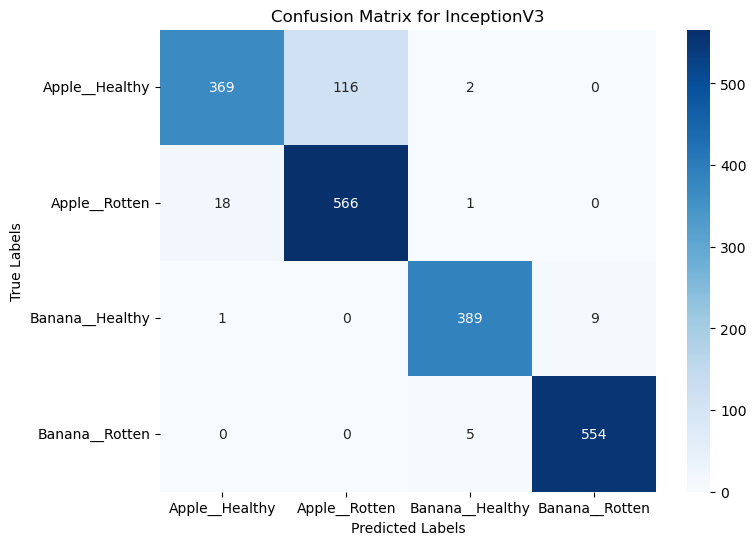

In [15]:
for model_name, base_model in models.items():
    model = build_and_compile_model(base_model)
    histories[model_name] = train_model(model, model_name)
    evaluate_model(model, model_name)
    trained_models[model_name] = model

In [16]:
# Save the best model for deployment
best_model_name = max(histories, key=lambda m: max(histories[m].history['val_accuracy']))
best_model = trained_models[best_model_name]
best_model.save(f'D:/best_model_{best_model_name}.h5')
print(f"The best model is {best_model_name} and has been saved.")

The best model is InceptionV3 and has been saved.


In [23]:
# Print the summary for each trained model
for model_name, trained_model in trained_models.items():
    print(f"\nSummary for {model_name} after training:")
    trained_model.summary()


Summary for VGG16 after training:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,913,230 (56.89 MB)

 Trainable params: 66,180 (258.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 132,362 (517.04 KB)


Summary for ResNet50 after training:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 24,376,078 (92.99 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 525,578 (2.00 MB)


Summary for InceptionV3 after training:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 63, 63,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 63, 63,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 63, 63,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 61, 61,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 30, 30,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 30, 30,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 30, 30,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 22,591,150 (86.18 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 525,578 (2.00 MB)

In [41]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model(f'D:/best_model_InceptionV3.h5')

# Path to the external dataset
external_dataset_path = ('D:/Fruits_Vegetables_Dataset(12000)/Fruits/RottenBanana')
image_size = (128, 128)

# Load and preprocess images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=image_size)  # Load image with target size
    img_array = img_to_array(img) / 255.0  # Normalize the image
    return np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input

# Predict on new images
def predict_external_images(model, dataset_path):
    predictions = {}
    for image_name in os.listdir(dataset_path):
        image_path = os.path.join(dataset_path, image_name)
        img = preprocess_image(image_path)
        pred = model.predict(img)
        predicted_class = classes[np.argmax(pred)]
        predictions[image_name] = predicted_class
    return predictions

# Get predictions
external_predictions = predict_external_images(best_model, external_dataset_path)

# Print the results
for image_name, predicted_class in external_predictions.items():
    print(f"Image: {image_name} -> Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━

In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model(f'D:/best_model_InceptionV3.h5')

# Path to the external dataset
external_dataset_path = ('D:/Fruits_Vegetables_Dataset(12000)/Fruits/FreshBanana')
image_size = (128, 128)

# Load and preprocess images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=image_size)  # Load image with target size
    img_array = img_to_array(img) / 255.0  # Normalize the image
    return np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input

# Predict on new images
def predict_external_images(model, dataset_path):
    predictions = {}
    for image_name in os.listdir(dataset_path):
        image_path = os.path.join(dataset_path, image_name)
        img = preprocess_image(image_path)
        pred = model.predict(img)
        predicted_class = classes[np.argmax(pred)]
        predictions[image_name] = predicted_class
    return predictions

# Get predictions
external_predictions = predict_external_images(best_model, external_dataset_path)

# Print the results
for image_name, predicted_class in external_predictions.items():
    print(f"Image: {image_name} -> Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━

In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model(f'D:/best_model_InceptionV3.h5')

# Path to the external dataset
external_dataset_path = ('D:/Fruits_Vegetables_Dataset(12000)/Fruits/FreshBanana')
image_size = (128, 128)

# Load and preprocess images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=image_size)  # Load image with target size
    img_array = img_to_array(img) / 255.0  # Normalize the image
    return np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input

# Predict on new images
def predict_external_images(model, dataset_path):
    predictions = {}
    for image_name in os.listdir(dataset_path):
        image_path = os.path.join(dataset_path, image_name)
        img = preprocess_image(image_path)
        pred = model.predict(img)
        predicted_class = classes[np.argmax(pred)]
        predictions[image_name] = predicted_class
    return predictions

# Get predictions
external_predictions = predict_external_images(best_model, external_dataset_path)

# Print the results
for image_name, predicted_class in external_predictions.items():
    print(f"Image: {image_name} -> Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


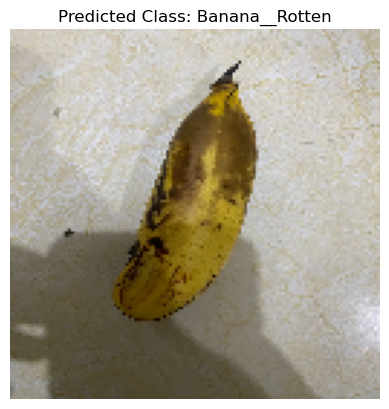

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model(f'D:/best_model_InceptionV3.h5')

# Path to a single image
single_image_path = 'C:/Users/fayah/Downloads/prediksi luar dataset/pisang1 (2).jpg'  # Ganti dengan path gambar Anda
image_size = (128, 128)

# Load and preprocess a single image
def preprocess_single_image(image_path):
    img = load_img(image_path, target_size=image_size)  # Resize image
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    return np.expand_dims(img_array, axis=0), img_array  # Return both for prediction and display

# Predict the class of the single image
def predict_single_image(model, image_path):
    img, img_array = preprocess_single_image(image_path)
    pred = model.predict(img)
    predicted_class = classes[np.argmax(pred)]  # Decode prediction
    return predicted_class, img_array

# Get prediction and display the image
predicted_class, img_array = predict_single_image(best_model, single_image_path)

# Display the image with predicted class
plt.imshow(img_array)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')  # Remove axis for better visualization
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


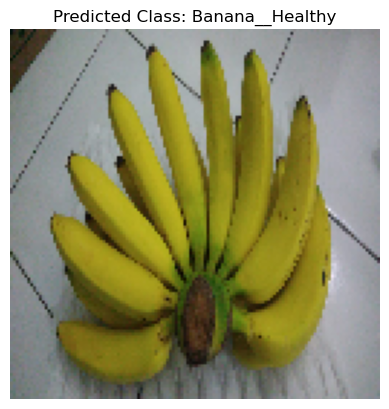

In [20]:
# Path to a single image
single_image_path = 'C:/Users/fayah/Downloads/prediksi luar dataset/pisang1.jpg'  # Ganti dengan path gambar Anda
# Get prediction and display the image
predicted_class, img_array = predict_single_image(best_model, single_image_path)

# Display the image with predicted class
plt.imshow(img_array)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')  # Remove axis for better visualization
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


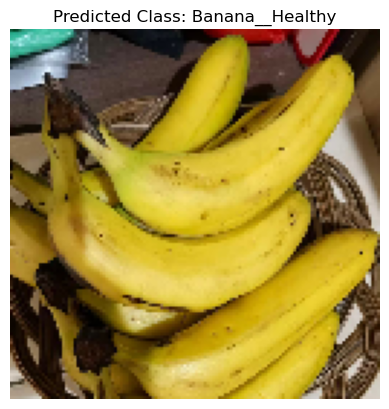

In [32]:
# Path to a single image
single_image_path = 'C:/Users/fayah/Downloads/prediksi luar dataset/WhatsApp Image 2024-12-31 at 00.29.43.jpeg'  # Ganti dengan path gambar Anda
# Get prediction and display the image
predicted_class, img_array = predict_single_image(best_model, single_image_path)

# Display the image with predicted class
plt.imshow(img_array)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')  # Remove axis for better visualization
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


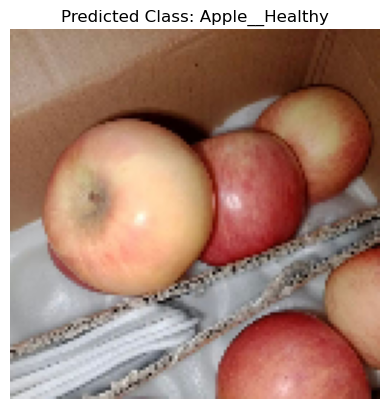

In [34]:
# Path to a single image
single_image_path = 'C:/Users/fayah/Downloads/prediksi luar dataset/WhatsApp Image 2024-12-31 at 00.29.44 (3).jpeg'  # Ganti dengan path gambar Anda
# Get prediction and display the image
predicted_class, img_array = predict_single_image(best_model, single_image_path)

# Display the image with predicted class
plt.imshow(img_array)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')  # Remove axis for better visualization
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


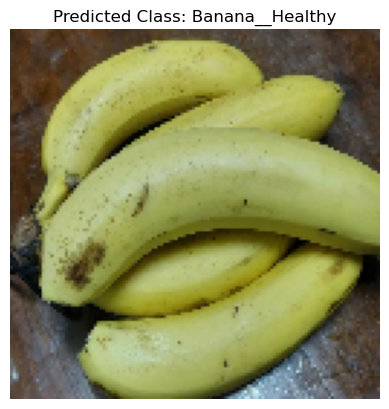

In [36]:
# Path to a single image
single_image_path = 'C:/Users/fayah/Downloads/prediksi luar dataset/WhatsApp Image 2024-12-31 at 00.29.43 (1).jpeg'  # Ganti dengan path gambar Anda
# Get prediction and display the image
predicted_class, img_array = predict_single_image(best_model, single_image_path)

# Display the image with predicted class
plt.imshow(img_array)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')  # Remove axis for better visualization
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


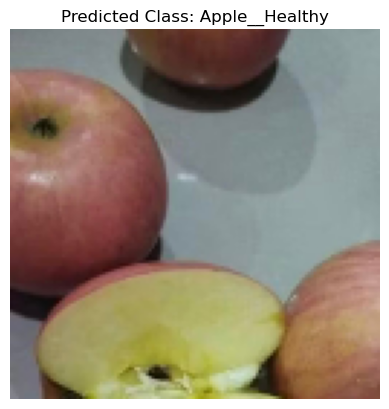

In [38]:
# Path to a single image
single_image_path = 'C:/Users/fayah/Downloads/prediksi luar dataset/WhatsApp Image 2024-12-31 at 00.29.44 (2).jpeg'  # Ganti dengan path gambar Anda
# Get prediction and display the image
predicted_class, img_array = predict_single_image(best_model, single_image_path)

# Display the image with predicted class
plt.imshow(img_array)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')  # Remove axis for better visualization
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


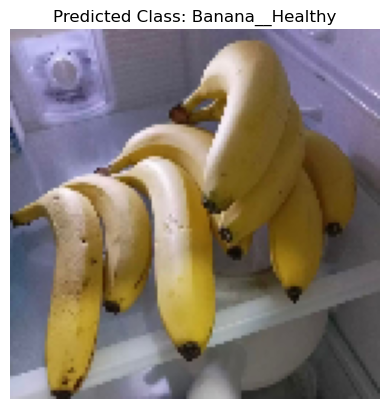

In [41]:
# Path to a single image
single_image_path = 'C:/Users/fayah/Downloads/prediksi luar dataset/WhatsApp Image 2024-12-31 at 00.29.43 (2).jpeg'  # Ganti dengan path gambar Anda
# Get prediction and display the image
predicted_class, img_array = predict_single_image(best_model, single_image_path)

# Display the image with predicted class
plt.imshow(img_array)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')  # Remove axis for better visualization
plt.show()

In [ ]:
# Path to a single image
single_image_path = 'C:/Users/fayah/Downloads/prediksi luar dataset/WhatsApp Image 2024-12-31 at 00.29.43 (2).jpeg'  # Ganti dengan path gambar Anda
# Get prediction and display the image
predicted_class, img_array = predict_single_image(best_model, single_image_path)

# Display the image with predicted class
plt.imshow(img_array)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')  # Remove axis for better visualization
plt.show()